In [2]:
import pandas as pd
import re
import seaborn as sns
import ast


In [2]:
methods = pd.read_csv('codelists/output/snomed_methods.csv')
methods['methods'] = methods['methods'].astype(str)
methods.head()

,concept,methods,category
0,172286002,['360270004 | Therapy - action (qualifier valu...,NaN
1,13004001,['419656003 | Examination AND/OR history takin...,NaN
2,81092009,['129306000 | Surgical removal - action (quali...,NaN
3,395096001,['360037004 | Imaging - action (qualifier valu...,NaN
4,73761001,['419656003 | Examination AND/OR history takin...,NaN


In [3]:
methods_col =  [x.strip('[]').split(',') for x in methods['methods']]
methods_col

[["'360270004 | Therapy - action (qualifier value) |'",
  " '129264002 | Action (qualifier value) |'"],
 ["'419656003 | Examination AND/OR history taking - action (qualifier value) |'",
  " '302199004 | Examination - action (qualifier value) |'",
  " '129433002 | Inspection - action (qualifier value) |'",
  " '129265001 | Evaluation - action (qualifier value) |'",
  " '129264002 | Action (qualifier value) |'"],
 ["'129306000 | Surgical removal - action (qualifier value) |'",
  " '129304002 | Excision - action (qualifier value) |'",
  " '129303008 | Removal - action (qualifier value) |'",
  " '129284003 | Surgical action (qualifier value) |'",
  " '129264002 | Action (qualifier value) |'"],
 ["'360037004 | Imaging - action (qualifier value) |'",
  " '129265001 | Evaluation - action (qualifier value) |'",
  " '129264002 | Action (qualifier value) |'"],
 ["'419656003 | Examination AND/OR history taking - action (qualifier value) |'",
  " '302199004 | Examination - action (qualifier value)

In [4]:
all_methods = []
[all_methods.extend(x) for x in methods_col]
all_methods = [x.strip(' \' ') for x in all_methods]
all_methods = set(all_methods)
all_methods

{'129264002 | Action (qualifier value) |',
 '129265001 | Evaluation - action (qualifier value) |',
 '129284003 | Surgical action (qualifier value) |',
 '129287005 | Incision - action (qualifier value) |',
 '129289008 | Drainage - action (qualifier value) |',
 '129292007 | Evacuation - action (qualifier value) |',
 '129298006 | Division - action (qualifier value) |',
 '129300006 | Puncture - action (qualifier value) |',
 '129303008 | Removal - action (qualifier value) |',
 '129304002 | Excision - action (qualifier value) |',
 '129305001 | Wedge resection - action (qualifier value) |',
 '129306000 | Surgical removal - action (qualifier value) |',
 '129314006 | Biopsy - action (qualifier value) |',
 '129315007 | Incisional biopsy - action (qualifier value) |',
 '129316008 | Aspiration - action (qualifier value) |',
 '129318009 | Saucerization - action (qualifier value) |',
 '129319001 | Curettage - action (qualifier value) |',
 '129323009 | Scraping - action (qualifier value) |',
 '129325

In [5]:
pd.DataFrame(data={'method':list(all_methods)})

,method
0,129356005 | Reinforcement - action (qualifier ...
1,129357001 | Closure - action (qualifier value) |
2,129396007 | Electrodesiccation - action (quali...
3,129368001 | Cerclage - action (qualifier value) |
4,360020006 | Extirpation - action (qualifier va...
...,...
96,129319001 | Curettage - action (qualifier valu...
97,360270004 | Therapy - action (qualifier value) |
98,257863009 | Radioactive destruction (qualifier...
99,129409008 | Mobilization - action (qualifier v...


In [6]:
all_methods_df = pd.DataFrame(data={'method':list(all_methods)})
all_methods_df.to_csv('colorectal_all_methods.csv')

In [7]:
[x.strip('[]') for x in methods['methods']]

["'360270004 | Therapy - action (qualifier value) |', '129264002 | Action (qualifier value) |'",
 "'419656003 | Examination AND/OR history taking - action (qualifier value) |', '302199004 | Examination - action (qualifier value) |', '129433002 | Inspection - action (qualifier value) |', '129265001 | Evaluation - action (qualifier value) |', '129264002 | Action (qualifier value) |'",
 "'129306000 | Surgical removal - action (qualifier value) |', '129304002 | Excision - action (qualifier value) |', '129303008 | Removal - action (qualifier value) |', '129284003 | Surgical action (qualifier value) |', '129264002 | Action (qualifier value) |'",
 "'360037004 | Imaging - action (qualifier value) |', '129265001 | Evaluation - action (qualifier value) |', '129264002 | Action (qualifier value) |'",
 "'419656003 | Examination AND/OR history taking - action (qualifier value) |', '302199004 | Examination - action (qualifier value) |', '129433002 | Inspection - action (qualifier value) |', '12926500

In [8]:
aggregation_categories = pd.read_csv('aggregation-categories.csv')
aggregation_categories.head()

for index,row in methods.iterrows():
    if ( not pd.isna(row['methods']) ):
        for index_2, row_2 in aggregation_categories.iterrows():
            if row_2['snomed_concept'] in row['methods']:
                m = row['category']
                if pd.isna(m):
                    methods.loc[index,'category'] = row_2['category']
                else:
                    methods.loc[index, 'category'] =  m + row_2['category'] + ','

methods['category'] = methods['category'].fillna('Other')

methods

,concept,methods,category
0,172286002,['360270004 | Therapy - action (qualifier valu...,Other
1,13004001,['419656003 | Examination AND/OR history takin...,Diagnostic test
2,81092009,['129306000 | Surgical removal - action (quali...,Surgery other
3,395096001,['360037004 | Imaging - action (qualifier valu...,Imaging
4,73761001,['419656003 | Examination AND/OR history takin...,Diagnostic test
...,...,...,...
907,1156383000,['313029009 | Brachytherapy - action (qualifie...,Surgery other
908,448288001,['257863009 | Radioactive destruction (qualifi...,Surgery
909,359863000,['360028004 | Surgical biopsy - action (qualif...,Surgery other
910,174332006,['129306000 | Surgical removal - action (quali...,Surgery other


In [9]:
snomed_to_category = dict(zip( methods['concept'], methods['category'] ))

In [5]:
opcs_codelist = pd.read_csv('codelists/output/omop/ukquery_colorectal_0_snomed_opcs.csv')

In [6]:
opcs_to_category = pd.DataFrame(data={
    'opcs': opcs_codelist['opcs'],
    'category': [snomed_to_category.get(s) for s in opcs_codelist['snomed']]
})

KeyError: 'snomed'

In [13]:
opcs_codelist['opcs'].str[0:1].value_counts()

opcs
H    257
X     24
Y     18
G     17
C      4
M      3
U      2
A      2
R      2
J      1
P      1
Name: count, dtype: int64

In [14]:
opcs_codelist['opcs'].str[0:3].value_counts()

opcs
H33    10
X65    10
H26    10
H10     9
H09     9
       ..
H47     1
G51     1
G58     1
G82     1
Y12     1
Name: count, Length: 80, dtype: int64

In [ ]:
opcs_to_category
opcs_to_category_count = opcs_to_category.groupby('opcs')['category'].nunique()

<Axes: xlabel='category', ylabel='Count'>

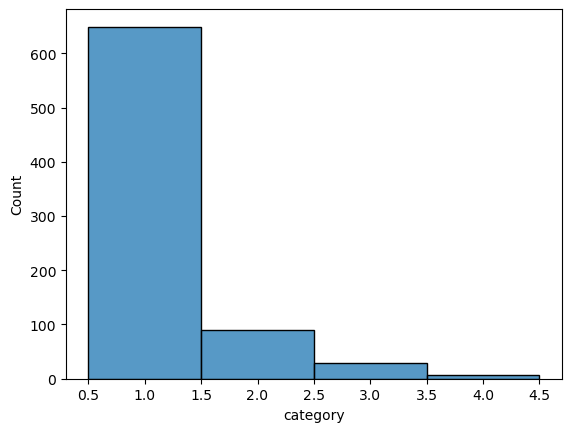

In [ ]:
sns.histplot( opcs_to_category.groupby('opcs')['category'].nunique(), discrete=True )